In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.metrics import root_mean_squared_log_error, root_mean_squared_error
import lightgbm as lgb
from itertools import product
import re

In [75]:
train_df = pd.read_csv('data/train.csv', parse_dates=['date']).drop(columns='id')
test_df = pd.read_csv('data/test.csv', parse_dates=['date']).drop(columns='id')
transactions_df = pd.read_csv('data/transactions.csv', parse_dates=['date'])
oil_df = pd.read_csv('data/oil.csv', parse_dates=['date'])
holidays_df = pd.read_csv('data/holidays_events.csv', parse_dates=['date'])
stores_df = pd.read_csv('data/stores.csv')

In [78]:
# Delete all holidays
print("Train # Days:", len(train_df['date'].unique()))
print("# Holidays:", len(holidays_df['date'].unique()))

holidays_removed = train_df[~train_df['date'].isin(holidays_df['date'])]
holidays_removed.isna().sum()

print("Leftover days:", len(holidays_removed['date'].unique()))

Train # Days: 1684
# Holidays: 312
Leftover days: 1432


Text(0.5, 0.98, 'Trailing Zeros')

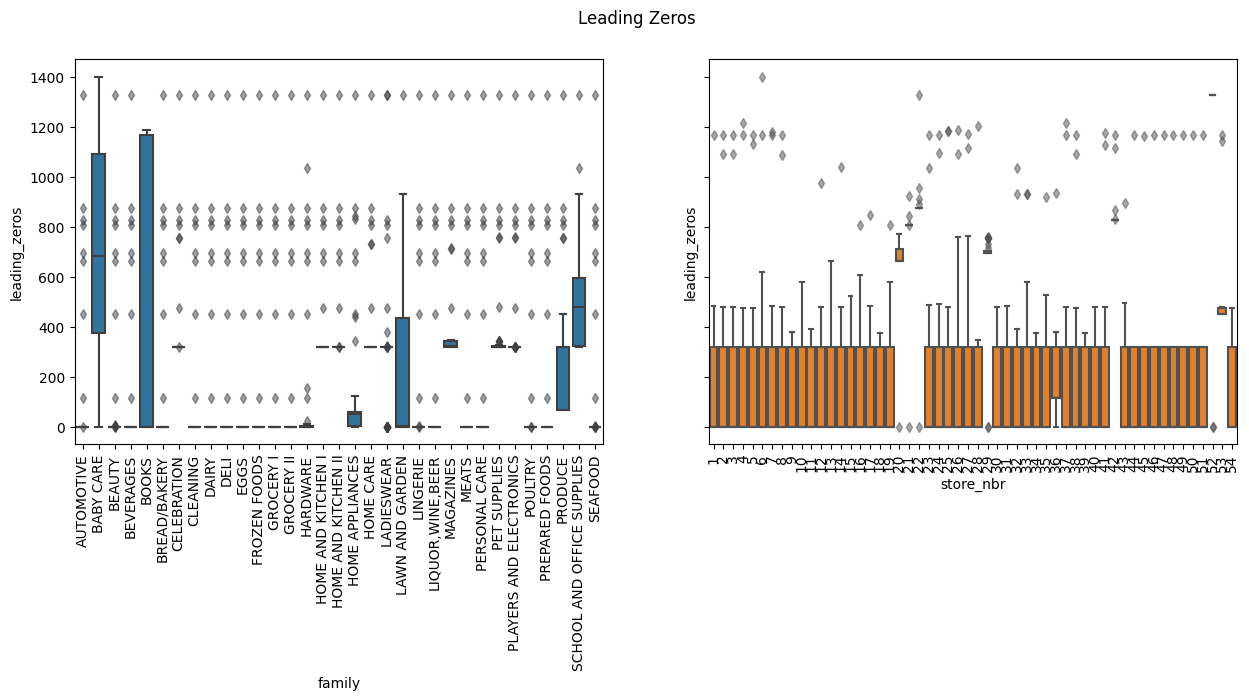

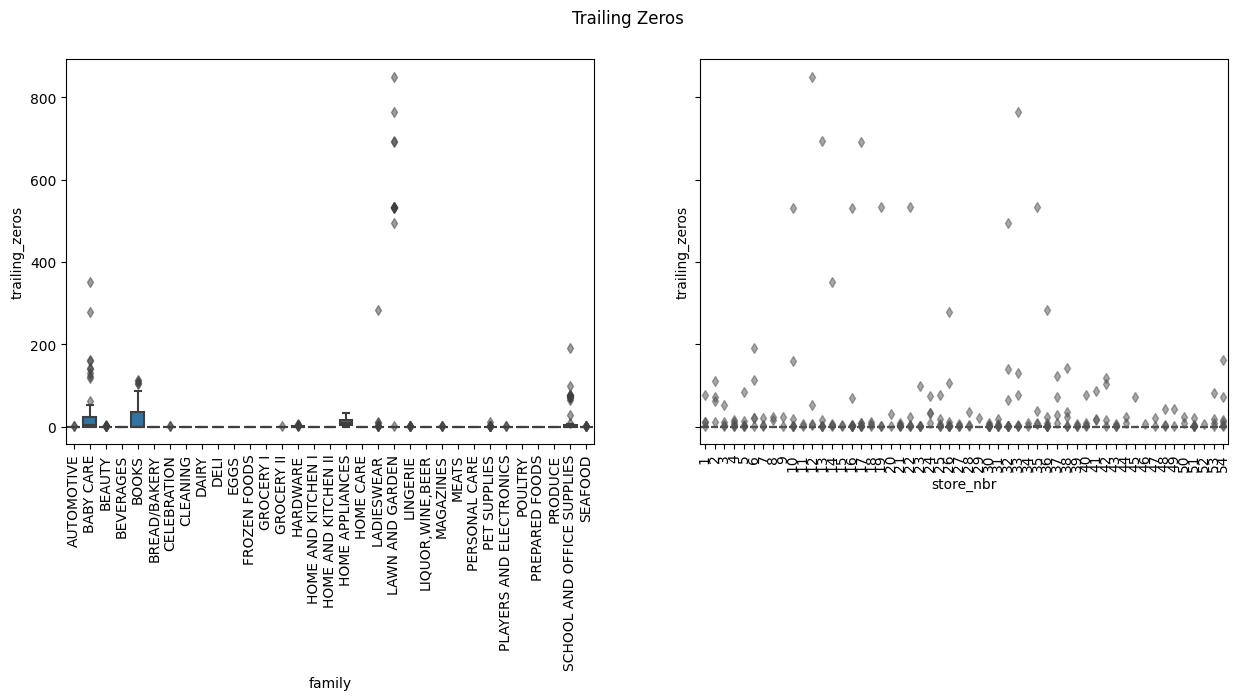

In [106]:
# Trailing and leading zeros

COLORS = list(sns.color_palette())

plot_kwargs = {
    'linewidth': 1.5,
    'flierprops': {'alpha': 0.5}
}

pivoted = holidays_removed.pivot(index='date', columns=['store_nbr', 'family'], values='sales')
leading_zeros = pivoted.apply(lambda col : (col == 0).argmin()).to_frame('leading_zeros').reset_index()
trailing_zeros = pivoted.apply(lambda col : (col[::-1] == 0).argmin()).to_frame('trailing_zeros').reset_index()

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15,5))
sns.boxplot(data=leading_zeros, x='family', y='leading_zeros', **plot_kwargs, ax=ax1, color=COLORS[0])
plt.sca(ax1)
plt.xticks(rotation=90)
sns.boxplot(data=leading_zeros, x='store_nbr', y='leading_zeros', **plot_kwargs, ax=ax2, color=COLORS[1])
plt.sca(ax2)
plt.xticks(rotation=90);
fig.suptitle("Leading Zeros")

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15,5))
sns.boxplot(data=trailing_zeros, x='family', y='trailing_zeros', **plot_kwargs, ax=ax1, color=COLORS[0])
plt.sca(ax1)
plt.xticks(rotation=90)
sns.boxplot(data=trailing_zeros, x='store_nbr', y='trailing_zeros', **plot_kwargs, ax=ax2, color=COLORS[1])
plt.sca(ax2)
plt.xticks(rotation=90);
fig.suptitle("Trailing Zeros")